In [ ]:
print(cp.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']


In [ ]:
import cvxpy as cp
import numpy as np
import osqp
# import dccp

C = np.load('/content/drive/MyDrive/mfds/C.npy').astype(np.float64)
y = np.load('/content/drive/MyDrive/mfds/y.npy').astype(np.int64)
y = np.squeeze(y)
A_inv = np.load('/content/drive/MyDrive/mfds/A_inv.npy').astype(np.float64)
C.shape, y.shape, A_inv.shape

((2820, 9400), (2820,), (9400, 9400))

In [ ]:
s = cp.Variable(C.shape[1])
print(s.shape)
# np.linalg.norm(s)#, ord = 1)sum(abs(s)),[y == C@s])#
prob = cp.Problem(cp.Minimize(cp.norm(s,1)),[y == C@s])#,[cp.norm(y - C@s, 2) == 0])
# dccp.is_dccp(prob)
result = prob.solve(solver=cp.OSQP)
print(s.value)

(9400,)
[8.33202963e+03 1.04304557e+03 5.05982551e-03 ... 1.59242270e-03
 7.15622720e+00 2.00332205e-02]


In [ ]:
np.save('/content/drive/MyDrive/mfds/s.npy', s.value)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# type(s)
# a = s.value
# type(a)
# s.value = 
# C.dtype

In [ ]:
# A_inv = A_inv.astype(float64)
# A = np.linalg.inv(A_inv)
x = A_inv@s.value
# A.shape

In [ ]:
np.save('/content/drive/MyDrive/mfds/x',x)

(100, 94, 3)


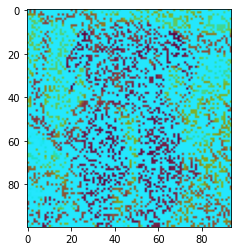

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = np.array(cv2.imread('/content/drive/MyDrive/mfds/incomplete.png'))
print(img.shape)
plt.imshow(img)

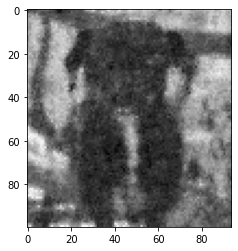

In [ ]:
# a = np.array(s)
# type(a), a.shape
plt.imshow(x.reshape(img.shape[1],img.shape[0]).T,cmap='gray')